In [1]:
import sys


In [3]:
#sys.path.append("/home/edixon1/GillesPy2/gillespy2")
#sys.path.append("/Users/ghilman/Documents/Coding/repo/GillesPy2")
sys.path.append("/home/dalton/environments/Gillespy2/Repository/gillespy2")

In [4]:
sys.path


['',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/home/dalton/.local/lib/python3.6/site-packages',
 '/usr/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/dalton/.ipython',
 '/home/dalton/environments/Gillespy2/Repository/gillespy2']

In [5]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [6]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

Clean: CompletedProcess(args=['make', '-C', '/home/dalton/environments/GillesPy2/Repository/gillespy2/c_base/', 'cleanSimulation'], returncode=0, stdout=b"make: Entering directory '/home/dalton/environments/GillesPy2/Repository/gillespy2/c_base'\nrm -f UserSimulation\nmake: Leaving directory '/home/dalton/environments/GillesPy2/Repository/gillespy2/c_base'\n")
Build: CompletedProcess(args=['make', '-C', '/home/dalton/environments/GillesPy2/Repository/gillespy2/c_base/', 'UserSimulation'], returncode=0, stdout=b"make: Entering directory '/home/dalton/environments/GillesPy2/Repository/gillespy2/c_base'\ng++ UserSimulation.cpp -Wall -O3 -o UserSimulation model.o ssa.o\nmake: Leaving directory '/home/dalton/environments/GillesPy2/Repository/gillespy2/c_base'\n")


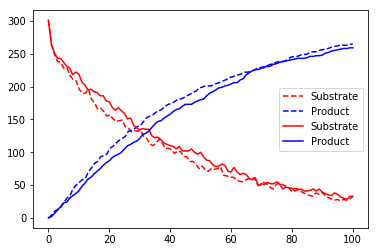

In [ ]:
#import pyximport
from gillespy2 import SSASolver, SSACSolver
model = MichaelisMenten()
results = model.run(show_labels=False)
dresults = model.run(solver=SSACSolver, show_labels=False)
plt.plot(dresults[0][:,0],dresults[0][:,1],'--r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,4],'--b', label='Product')
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

In [ ]:
import time
from gillespy2 import SSASolver, StochKitSolver, BasicSSASolver
import numpy as np
log2_trajectories_max = 10
loops = 10
solvers = [StochKitSolver, SSASolver, BasicSSASolver]
timing_data = np.zeros((log2_trajectories_max+1,len(solvers)+1))
for n in range(0,log2_trajectories_max+1):
    timing_data[n, 0] = 2**n
    for i in range(loops):
        for solver in range(len(solvers)):
            time_start = time.perf_counter()
            model.run(solver=solvers[solver], show_labels=False, number_of_trajectories=2**n)
            time_end = time.perf_counter()
            timing_data[n, solver+1] += (time_end - time_start)/loops
    print(timing_data[n,:])
print(timing_data)

[1.         0.03600625 0.07359912 0.1437143 ]
[2.         0.03947011 0.13910665 0.28439281]
[4.         0.04532785 0.2743744  0.56013341]
[8.         0.05825625 0.53908771 1.12036398]


In [ ]:
plt.plot(timing_data[:,0],timing_data[:,1],'-r', label='StochKit')
plt.plot(timing_data[:,0],timing_data[:,2],'-b', label='Cython')
plt.plot(timing_data[:,0],timing_data[:,3],'-g', label='Numpy')
plt.plot(timing_data[:,0],timing_data[:,4],'-k', label='Python')
plt.title("SSA Simulation Time")
plt.ylabel("Seconds")
plt.xlabel("Trajectories")
plt.legend(loc='best')
plt.savefig("SSA_Comparisons3.png")